# Project 1 - Appendix

## Saint Louis Public School District (SLPS) Scorecard
Public Data Source - Missouri Department of Elementary and Secondary Education (DESE).
__[Source](https://dese.mo.gov/school-data)__


## I. Building Data:
A.  SLPS School Name List. 

In [3]:
# import pandas as pd
import numpy as np

In [ ]:
# original source of data file - http://mcds.dese.mo.gov/guidedinquiry/District%20and%20School%20Information/School%20Building%20List.aspx

# name data file variable
building_data = "School Building List SLPS.csv"

# read file and set data frame
zip_data = pd.read_csv(building_data)
print(zip_data)

# inspecting file
zip_data.head(1)

school_zips = pd.DataFrame(zip_data)
school_zips.head(1)

school_zips['ELEMENTARY_SCHOOL_FLAG'] = school_zips['ELEMENTARY_SCHOOL_FLAG'].apply(lambda s: s.replace('Y', 'Elementary'))
school_zips.head(1)

school_zips['MIDDLE_SCHOOL_FLAG'] = school_zips['MIDDLE_SCHOOL_FLAG'].apply(lambda s: s.replace('Y', 'Middle'))
school_zips.head(1)

school_zips['JUNIOR_HIGH_SCHOOL_FLAG'] = school_zips['JUNIOR_HIGH_SCHOOL_FLAG'].apply(lambda s: s.replace('Y', 'Junior High'))
school_zips.head(1)

school_zips['HIGH_SCHOOL_FLAG'] = school_zips['HIGH_SCHOOL_FLAG'].apply(lambda s: s.replace('Y', 'High'))
school_zips.head(1)

school_zips['AVTS_FLAG'] = school_zips['AVTS_FLAG'].apply(lambda s: s.replace('Y', 'High'))
school_zips.head(1)

#removing AVTS because not a traditional public school
#school_zips['ALTERNATIVE_SCHOOL_FLAG'] = school_zips['ALTERNATIVE_SCHOOL_FLAG'].apply(lambda s: s.replace('Y', 'Alternative'))
#school_zips.head()

school_zips['type_combined']=school_zips['ELEMENTARY_SCHOOL_FLAG'].astype(str)+school_zips['MIDDLE_SCHOOL_FLAG']+school_zips['JUNIOR_HIGH_SCHOOL_FLAG']+school_zips['HIGH_SCHOOL_FLAG']+school_zips['AVTS_FLAG']

school_zips.head(1)

school_zips_type = pd.DataFrame(data=school_zips, columns = ["SCHNUM","SCHNAME","SCHADDR1","SCHZIP","type_combined"])
school_zips_type.head(1)

school_zips_type['SCHZIP'] = school_zips_type.SCHZIP.astype(str)
school_zips_type['Zip'] = school_zips_type['SCHZIP'].str.slice(0,5)

school_zips_type['SCHZIP'] = pd.Categorical(school_zips_type.SCHZIP)

school_zips_type.head(1)

District_List = pd.DataFrame(data = school_zips_type, columns = ["Zip","SCHNUM","SCHNAME","SCHADDR1","type_combined"])
District_List.head(1)

# list of zip codes to be processed (where entire zip code is located within City Boundary, removing zips partially located in boundary)
valid_zips = ['63101', '63102', '63103', '63104', '63106', '63107', '63108', '63109', '63110', '63111','63112', '63113',
            '63115', '63116', '63118', '63139','63147']


#District_List_Valid_Zips = pd.DataFrame(data = District_List, columns = ["Zip Code","SCHNUM","SCHNAME","SCHADDR1","type_combined"])
District_List.Zip.isin(valid_zips)
District_List= District_List[District_List.Zip.isin(valid_zips)]
District_List.Zip.shape
District_List.head(1)

District_List.columns = ['Zip Code','School Number','School_Name', 'School Address','Grade Levels']
District_List['School_Name'] = District_List['School_Name'].str.upper()
District_List['School_Name'] = District_List.School_Name.str.replace(r"[']",'')
District_List.head(1)

## I. Building Data:
   B. SLPS School Enrollment Data
    

In [21]:
# original source of data file - http://mcds.dese.mo.gov/guidedinquiry/District%20and%20Building%20Student%20Indicators/Building%20Demographic%20Data.aspx

# name data file variable
demographic_data = "Building Demographic Data SLPS Total.csv"
demographic_data = pd.read_csv(demographic_data)
print(demographic_data)
#demographic_data.head(1)

size=pd.DataFrame(demographic_data, columns = ['Chart1_SeriesGroup_label', 'Chart1_SeriesGroup_Chart1_CategoryGroup_label', 'Chart1_SeriesGroup_Chart1_CategoryGroup_Value_X'])
size.head(1)

size.drop(size.index[:402], inplace=True)
size.head(1)

size['school_new'] = size['Chart1_SeriesGroup_label'].str[-5:]

size['school_new'] = size['school_new'].str[:-1]

size.head(1)

School_Size = pd.DataFrame(data = size, columns = ["school_new","Chart1_SeriesGroup_Chart1_CategoryGroup_label","Chart1_SeriesGroup_Chart1_CategoryGroup_Value_X"])
School_Size.head(1)
#School_Size.to_csv('school_size.csv')

School_Size.columns = ['School Number', 'Year','Size']
School_Size['Size'] = School_Size.Size.str.replace(r"[*]",'')
School_Size['Size'] = School_Size.Size.str.replace(r"[,]",'')
#School_Size.head()
#School_Size.info()
#School_Size.to_csv('school_size2.csv')

School_Size["Size"] = pd.to_numeric(School_Size.Size, errors='coerce')
#School_Size.to_csv('school_size2.csv')

School_Size.info()

Size_Summary = School_Size.groupby(['School Number']).mean()

#Size_Summary.head()
print(Size_Summary)

District_List.info()

Size_Summary.info()

District_List['School Number']=District_List['School Number'].apply(str)

District_Join = District_List.join(Size_Summary,on="School Number",how='outer')
District_Join.head(1)

#District_Join.to_csv('district_join.csv')

District_Join = District_Join[District_Join["Size"] > 0]
District_Join = District_Join[District_Join['Zip Code'].notnull()]
District_Join['School_Name']=District_Join['School_Name'].str[:-1]
District_Join['School_Name'] = District_Join.School_Name.str.replace(r"[']",'')
District_Join

Zip_Size = District_Join.groupby(['Zip Code']).mean()
Zip_Size
#Note - Size is an average of total students per building from last 5 years (2013-2017)

District_Join.describe()

Zip_Size.describe()

                          Chart1_SeriesGroup_label  \
0                       ACAD OF ENVT SCI/MATH ELEM   
1                       ACAD OF ENVT SCI/MATH ELEM   
2                       ACAD OF ENVT SCI/MATH ELEM   
3                       ACAD OF ENVT SCI/MATH ELEM   
4                       ACAD OF ENVT SCI/MATH ELEM   
5                     ACAD OF ENVT SCI/MATH MIDDLE   
6                     ACAD OF ENVT SCI/MATH MIDDLE   
7                     ACAD OF ENVT SCI/MATH MIDDLE   
8                     ACAD OF ENVT SCI/MATH MIDDLE   
9                     ACAD OF ENVT SCI/MATH MIDDLE   
10                                     ADAMS ELEM.   
11                                     ADAMS ELEM.   
12                                     ADAMS ELEM.   
13                                     ADAMS ELEM.   
14                                     ADAMS ELEM.   
15                          AMES VISUAL/PERF. ARTS   
16                          AMES VISUAL/PERF. ARTS   
17                          

## I. Building Data:
C. SLPS School Funding Data

In [40]:
# original source of data file - http://mcds.dese.mo.gov/guidedinquiry/District%20and%20School%20Information/School%20Finance%20Report.aspx

# name data file variable
finance_data = "School Finance Report SLPS.csv"

# read file and set data frame
finance_data = pd.read_csv(finance_data)
print(finance_data)

#select St. Louis city rows
finance_data = finance_data[finance_data["DISTRICT_NAME"] == "ST. LOUIS CITY"]
finance_data.head(1)

finance_data = finance_data[finance_data["YEAR"] >"2012"]
finance_data.head(1)

Exp_Per_ADA = pd.DataFrame(data = finance_data, columns = ["YEAR","CURRENT_EXPENDITURE_PER_AVERAGE_DAILY_ATTENDANCE2"])
Exp_Per_ADA.head()

#Note - ADA = Average Daily Expenditure = (total annual expenditure /Average Daily Attendance)
Exp_Per_ADA.columns = ['Year','Cost_Per_Student']
#Exp_Per_ADA.head()
Exp_Per_ADA.info()

Exp_Per_ADA['Cost_Per_Student'] = Exp_Per_ADA.Cost_Per_Student.str.replace(r"[$]",'')
Exp_Per_ADA['Cost_Per_Student'] = Exp_Per_ADA.Cost_Per_Student.str.replace(r"[,]",'')
#School_Size['Size'] = School_Size.Size.str.replace(r"[,]",'')
# Use - https://towardsdatascience.com/5-methods-to-remove-the-from-your-data-in-python-and-the-fastest-one-281489382455

Exp_Per_ADA.head()

Exp_Per_ADA['Cost_Per_Student'] = pd.to_numeric(Exp_Per_ADA.Cost_Per_Student, errors='coerce')
Exp_Per_ADA.info()

Exp_Per_ADA.mean()

Avg_Cost_Per_Student = Exp_Per_ADA["Cost_Per_Student"].mean()
#Avg_Cost_Per_Student (this is avg cost over last 5 years)
Avg_Cost_Per_Student

#District_Join('Total Funding')="Size"*"Avg_Cost_Per_Student"
#District_Join.head()
District_Join['Total Funding'] = District_Join.Size * Avg_Cost_Per_Student
District_Join.head(1)
#District_Join.to_csv('district_join2.csv')

## I. Building Data:
 D. SLPS School Student:Staff Ratio Data

In [52]:
# original source of data file - https://mcds.dese.mo.gov/guidedinquiry/District%20and%20Building%20Education%20Staff%20Indicators/Building%20Student%20Staff%20Ratios.aspx
students_per_teacher = "Building Student Staff Ratios Students per Teacher.csv"
students_per_teacher = pd.read_csv(students_per_teacher)
print(students_per_teacher)

students_per_teacher=pd.DataFrame(students_per_teacher)
students_per_teacher.head(1)

students_per_teacher.drop(students_per_teacher.index[:408], inplace=True)
students_per_teacher.head(1)

# rename columns and then get avg for each
students_per_teacher.columns = ['School_Name','Year','Students_Per_Teacher','Students_Per_Classroom', 'Students_Per_Admin']
students_per_teacher.head(1)

# clean school id column
students_per_teacher['School Number'] = students_per_teacher['School_Name'].str[-5:]
students_per_teacher.head(1)

students_per_teacher['School Number'] = students_per_teacher['School Number'].str[:-1]
students_per_teacher.head(1)

students_per_teacher = pd.DataFrame(data = students_per_teacher, columns = ["School Number","Year","Students_Per_Teacher","Students_Per_Classroom","Students_Per_Admin"])
students_per_teacher.head(1)

# change to numeric to get means
students_per_teacher['Students_Per_Teacher'] = pd.to_numeric(students_per_teacher.Students_Per_Teacher, errors='coerce')
students_per_teacher['Students_Per_Classroom'] = pd.to_numeric(students_per_teacher.Students_Per_Classroom, errors='coerce')
students_per_teacher['Students_Per_Admin'] = pd.to_numeric(students_per_teacher.Students_Per_Admin, errors='coerce')
students_per_teacher.info()

#obtain 5 yr avg for each school number
students_per_teacher = students_per_teacher.groupby(['School Number']).mean()
students_per_teacher.head(1)

students_per_teacher.info()

District_Join = District_Join.join(students_per_teacher,on="School Number",how='outer')
District_Join

District_Join = District_Join[District_Join["Size"] > 0]
District_Join = District_Join[District_Join['Zip Code'].notnull()]
District_Join

       StudentStaffRatios_Charts_SeriesGroup_label  \
0                ACAD OF ENVT SCI/MATH ELEM (4990)   
1                ACAD OF ENVT SCI/MATH ELEM (4990)   
2                ACAD OF ENVT SCI/MATH ELEM (4990)   
3                ACAD OF ENVT SCI/MATH ELEM (4990)   
4                ACAD OF ENVT SCI/MATH ELEM (4990)   
5              ACAD OF ENVT SCI/MATH MIDDLE (3250)   
6              ACAD OF ENVT SCI/MATH MIDDLE (3250)   
7              ACAD OF ENVT SCI/MATH MIDDLE (3250)   
8              ACAD OF ENVT SCI/MATH MIDDLE (3250)   
9              ACAD OF ENVT SCI/MATH MIDDLE (3250)   
10                              ADAMS ELEM. (4000)   
11                              ADAMS ELEM. (4000)   
12                              ADAMS ELEM. (4000)   
13                              ADAMS ELEM. (4000)   
14                              ADAMS ELEM. (4000)   
15                   AMES VISUAL/PERF. ARTS (4250)   
16                   AMES VISUAL/PERF. ARTS (4250)   
17                   AMES VI

## I. Building Data:
    E. SLPS School Adequate Yearly Progress (AYP) Data "All schools, districts and states are required by the No Child Left Behind (NCLB) Act to show that students are making Adequate Yearly Progress (AYP)."

In [64]:
# name data file variable
apr_data = "APR Summary By Buildings.csv"
apr_data

# read file and set data frame
ayp_data = pd.read_csv(apr_data)
print(ayp_data)

# inspecting file
ayp_data.head(1)

ayp_slps = ayp_data[ayp_data["DISTRICT NAME"]=="ST. LOUIS CITY"]
ayp_slps

ayp_slps = pd.DataFrame(data=ayp_slps, columns = ["YEAR", "SCHL CODE","Total Pts Ernd", "Total Pts Poss"])
ayp_slps

ayp_slps.columns = ['Year','School Number','Total_Pts_Ernd', 'Total_Pts_Poss']
ayp_slps.head(1)

ayp_slps.info()

ayp_slps['School Number']=ayp_slps['School Number'].apply(str)

ayp_slps.info()

ayp_slps['Total_Pts_Ernd'] = pd.to_numeric(ayp_slps.Total_Pts_Ernd, errors='coerce')
ayp_slps.info()

ayp_slps = ayp_slps[ayp_slps['Total_Pts_Ernd']>0]
ayp_slps = ayp_slps[ayp_slps['Total_Pts_Ernd'].notnull()]
ayp_slps

ayp_avg = pd.DataFrame(data=ayp_slps, columns = ["School Number", "Total_Pts_Ernd", "Total_Pts_Poss"])
ayp_avg.info()

#obtain sum of available pts for each school number
ayp_avg = ayp_slps.groupby(['School Number']).sum()
ayp_avg.info()

ayp_avg['Avg_AYP'] = ayp_avg.Total_Pts_Ernd/ayp_avg.Total_Pts_Poss
ayp_avg.info()

new_avg = pd.DataFrame(data=ayp_avg, columns = ["Avg_AYP"])
new_avg

District_Join = District_Join.join(new_avg,on="School Number",how='outer')
District_Join

District_Join = District_Join[District_Join['Zip Code'].notnull()]
District_Join

'APR Summary By Buildings.csv'

# II. Student Data:
    A. Building Discipling Incidents Total (per 100 Students). Source: 
    http://mcds.dese.mo.gov/guidedinquiry/District%20and%20Building%20Student%20Indicators/Building%20Discipline%20Incidents.aspx

In [81]:
# name data file variable
discipline_file = "Building Discipline Incidents Total Per 100 Students.csv"
# read file and set data frame
discipline_data = pd.read_csv(discipline_file)
print(discipline_data)

discipline_data = pd.DataFrame(discipline_data)
discipline_data.head(100)

discipline_data.drop(discipline_data.index[:407], inplace=True)
discipline_data.head(1)

discipline_data = pd.DataFrame(data=discipline_data, columns = ["DisciplineIncidents_Chart_SeriesGroup_label","DisciplineIncidents_Chart_SeriesGroup_DisciplineIncidents_Chart_CategoryGroup_label","DisciplineIncidents_Chart_SeriesGroup_DisciplineIncidents_Chart_CategoryGroup_Value_Y","Unnamed: 3", "Unnamed: 4"])
discipline_data.head(1)

discipline_data.columns = ['School Number', 'Year', 'Enrollment', 'Total_Number_Incidents', 'Incident_Rate']
discipline_data.head()

# clean school id column
discipline_data['School Number'] = discipline_data['School Number'].str[-5:]
discipline_data.head(1)

discipline_data['School Number'] = discipline_data['School Number'].str[:-1]
discipline_data.head(1)

discipline_data.info()

discipline_data['Enrollment'] = discipline_data.Enrollment.str.replace(r"[,]",'')
discipline_data['Enrollment'] = pd.to_numeric(discipline_data.Enrollment, errors='coerce')
discipline_data['Total_Number_Incidents'] = pd.to_numeric(discipline_data.Total_Number_Incidents, errors='coerce')
discipline_data['Incident_Rate'] = pd.to_numeric(discipline_data.Incident_Rate, errors='coerce')
discipline_data.info()

#obtain sum of available incidents for each school number
discipline_data = discipline_data.groupby(['School Number']).sum()
discipline_data.head()

discipline_data['Avg_Incident'] = discipline_data.Total_Number_Incidents/discipline_data.Enrollment
discipline_data.info()

inc_avg = pd.DataFrame(data=discipline_data, columns = ["Avg_Incident"])
inc_avg = inc_avg[inc_avg['Avg_Incident'].notnull()]
inc_avg

District_Join = District_Join.join(inc_avg,on="School Number",how='outer')
District_Join

District_Join = District_Join[District_Join['Zip Code'].notnull()]
District_Join

    DisciplineIncidents_Chart_SeriesGroup_label  \
0                    ACAD OF ENVT SCI/MATH ELEM   
1                    ACAD OF ENVT SCI/MATH ELEM   
2                    ACAD OF ENVT SCI/MATH ELEM   
3                    ACAD OF ENVT SCI/MATH ELEM   
4                    ACAD OF ENVT SCI/MATH ELEM   
5                  ACAD OF ENVT SCI/MATH MIDDLE   
6                  ACAD OF ENVT SCI/MATH MIDDLE   
7                  ACAD OF ENVT SCI/MATH MIDDLE   
8                  ACAD OF ENVT SCI/MATH MIDDLE   
9                  ACAD OF ENVT SCI/MATH MIDDLE   
10                                  ADAMS ELEM.   
11                                  ADAMS ELEM.   
12                                  ADAMS ELEM.   
13                                  ADAMS ELEM.   
14                                  ADAMS ELEM.   
15                       AMES VISUAL/PERF. ARTS   
16                       AMES VISUAL/PERF. ARTS   
17                       AMES VISUAL/PERF. ARTS   
18                       AMES V

# II. Student Data:
    B. Building Graduation Rate. Source: 
    http://mcds.dese.mo.gov/guidedinquiry/District%20and%20Building%20Graduation%20and%20Dropout%20Indic/Building%20Adjusted%20Cohort%20Graduation%20Rates.aspx

In [95]:
# name data file variable
graduation_file = "Building Graduation Rates SLPS.csv"
# read file and set data frame
graduation_data = pd.read_csv(graduation_file)
print(graduation_data)

graduation_data = pd.DataFrame(graduation_data)
graduation_data.head(1)

graduation_data = pd.DataFrame(data=graduation_data, columns = ["GraduationRates_Chart_SeriesGroup_label","GraduationRates_Chart_SeriesGroup_GraduationRates_Chart_CategoryGroup_label","GraduationRates_Chart_SeriesGroup_GraduationRates_Chart_CategoryGroup_Value_Y"])
graduation_data.head(1)

graduation_data.columns = ['School Number', 'Year', 'Graduation_Rate']
graduation_data.head()

# clean school id column
graduation_data['School Number'] = graduation_data['School Number'].str[-5:]
graduation_data.head(1)

graduation_data['School Number'] = graduation_data['School Number'].str[:-1]
graduation_data=graduation_data[graduation_data["Graduation_Rate"]>"0"]
graduation_data.head(1)

graduation_data.info()

graduation_data['Graduation_Rate'] = pd.to_numeric(graduation_data.Graduation_Rate, errors='coerce')
graduation_data.info()

#obtain sum of available graduaton rates for each school number
graduation_data = graduation_data.groupby(['School Number']).mean()
graduation_data.head()

District_Join = District_Join.join(graduation_data,on="School Number",how='outer')
District_Join

District_Join = District_Join[District_Join['Zip Code'].notnull()]
District_Join
#NaN rationale = Graduation Rates only appear for High Schools

    GraduationRates_Chart_SeriesGroup_label  \
0       ACAD OF ENVT SCI/MATH MIDDLE (3250)   
1       ACAD OF ENVT SCI/MATH MIDDLE (3250)   
2       ACAD OF ENVT SCI/MATH MIDDLE (3250)   
3       ACAD OF ENVT SCI/MATH MIDDLE (3250)   
4       ACAD OF ENVT SCI/MATH MIDDLE (3250)   
5           BEAUMONT CTE HIGH SCHOOL (1250)   
6           BEAUMONT CTE HIGH SCHOOL (1250)   
7           BEAUMONT CTE HIGH SCHOOL (1250)   
8           BEAUMONT CTE HIGH SCHOOL (1250)   
9           BEAUMONT CTE HIGH SCHOOL (1250)   
10            BIG PICTURE ELEM. ALT. (1021)   
11            BIG PICTURE ELEM. ALT. (1021)   
12            BIG PICTURE ELEM. ALT. (1021)   
13            BIG PICTURE ELEM. ALT. (1021)   
14            BIG PICTURE ELEM. ALT. (1021)   
15    BIG PICTURE MIDDLE & HIGH @ NW (1023)   
16    BIG PICTURE MIDDLE & HIGH @ NW (1023)   
17    BIG PICTURE MIDDLE & HIGH @ NW (1023)   
18    BIG PICTURE MIDDLE & HIGH @ NW (1023)   
19    BIG PICTURE MIDDLE & HIGH @ NW (1023)   
20           

# II. Student Data:
    C. Building ACT Scores. Source: 
    http://mcds.dese.mo.gov/guidedinquiry/District%20and%20Building%20Student%20Indicators/Building%20ACT.aspx

In [106]:
# name data file variable
ACT_file = "Building ACT SLPS Composite.csv"
# read file and set data frame
ACT_data = pd.read_csv(ACT_file)
print(ACT_data)

ACT_data.drop(ACT_data.index[:87], inplace=True)
ACT_data.head()

ACT_data = pd.DataFrame(data=ACT_data, columns = ["SCHOOL_NAME_label","SCHOOL_NAME_GROUP_YEAR_label","SCHOOL_NAME_GROUP_YEAR_Value_X","SCHOOL_NAME_GROUP_YEAR_Value_Y","Unnamed: 6"])
ACT_data.head(1)

ACT_data.columns = ['School_Name','Year','Grads', 'Grads_atorabove_NatlAvg',"ACT_Composite"]
ACT_data.head(1)

ACT_data['School_Name']=ACT_data['School_Name'].str[8:]
ACT_data.columns = ACT_data.columns.str.strip()
#ACT_data.to_csv('act3.csv')
ACT_data.head()

ACT_data['School_Name'] = ACT_data['School_Name'].apply(lambda s: s.replace('CARNAHAN SCH. OF THE FUTURE', 'CARNAHAN SCHOOL OF THE FUTURE'))
ACT_data['School_Name'] = ACT_data.School_Name.str.replace(r"[']",'')
ACT_data

ACT_data['Grads'] = pd.to_numeric(ACT_data.Grads, errors='coerce')
ACT_data['Grads_atorabove_NatlAvg'] = pd.to_numeric(ACT_data.Grads_atorabove_NatlAvg, errors='coerce')
ACT_data['ACT_Composite'] = pd.to_numeric(ACT_data.ACT_Composite, errors='coerce')
ACT_data.info()

ACT_composite = pd.DataFrame(data=ACT_data, columns = ["School_Name","Year","ACT_Composite"])
ACT_composite.head()

ACT_composite=ACT_composite.groupby(['School_Name']).mean()
ACT_composite=ACT_composite[ACT_composite['ACT_Composite'].notnull()]
ACT_composite

District_Join = District_Join.join(ACT_composite,on="School_Name",how='outer')
#District_Join.to_csv('district_join3.csv')
District_Join

#check NaNs above Carnahan and 2 others have naming issues
# Carnahan = keep, rename on district list
# ignore college prep and trans and law, neither appear on district list
District_Join = District_Join[District_Join['Zip Code'].notnull()]
District_Join

ACT_NatlAvg = pd.DataFrame(data=ACT_data, columns = ["School_Name","Grads","Grads_atorabove_NatlAvg"])
ACT_NatlAvg.head()

ACT_NatlAvg=ACT_NatlAvg.groupby(['School_Name']).sum()
ACT_NatlAvg

ACT_NatlAvg['%Grads_atorabove_NatlAvg'] = ACT_NatlAvg.Grads_atorabove_NatlAvg/ACT_NatlAvg.Grads
ACT_NatlAvg

ACT_NatlAvg = pd.DataFrame(data=ACT_NatlAvg, columns = ["%Grads_atorabove_NatlAvg"])
ACT_NatlAvg=ACT_NatlAvg[ACT_NatlAvg['%Grads_atorabove_NatlAvg'].notnull()]
ACT_NatlAvg

District_Join = District_Join.join(ACT_NatlAvg,on="School_Name",how='outer')
District_Join

District_Join = District_Join[District_Join['Zip Code'].notnull()]
#District_Join.to_csv('district_join4.csv')
District_Join

                          SCHOOL_NAME_label SCHOOL_NAME_GROUP_YEAR_label  \
0                  BEAUMONT CTE HIGH SCHOOL                         2013   
1                  BEAUMONT CTE HIGH SCHOOL                         2014   
2                  BEAUMONT CTE HIGH SCHOOL                         2015   
3                  BEAUMONT CTE HIGH SCHOOL                         2016   
4                  BEAUMONT CTE HIGH SCHOOL                         2017   
5               CARNAHAN SCH. OF THE FUTURE                         2013   
6               CARNAHAN SCH. OF THE FUTURE                         2014   
7               CARNAHAN SCH. OF THE FUTURE                         2015   
8               CARNAHAN SCH. OF THE FUTURE                         2016   
9               CARNAHAN SCH. OF THE FUTURE                         2017   
10           CENTRAL VISUAL/PERF. ARTS HIGH                         2013   
11           CENTRAL VISUAL/PERF. ARTS HIGH                         2014   
12          

# III. Teacher Data:
    A. Highly Qualified Teachers. Source:http://mcds.dese.mo.gov/guidedinquiry/District%20and%20Building%20Education%20Staff%20Indicators/Building%20Certification%20Status%20of%20Teachers.aspx

In [123]:
# original source of data file - http://mcds.dese.mo.gov/guidedinquiry/District%20and%20Building%20Education%20Staff%20Indicators/Building%20Certification%20Status%20of%20Teachers.aspx
# name data file variable
HQT_file = "Highly Qual Teachers.csv"
HQT_data = pd.read_csv(HQT_file)
print(HQT_data)

#HQT_data.head()
HQT_data=pd.DataFrame(HQT_data, columns = ['CertificationStatus_Chart_SeriesGroup_label', 'CertificationStatus_Chart_SeriesGroup_CertificationStatus_Chart_CategoryGroup_label', 'Unnamed: 5'])
HQT_data.head(1)

HQT_data.drop(HQT_data.index[:407], inplace=True)
HQT_data.head()

HQT_data.columns = ['School Number', 'Year', 'Percent_HQT']
HQT_data.head()

# clean school id column
HQT_data['School Number'] = HQT_data['School Number'].str[-5:]
HQT_data.head(1)

HQT_data['School Number'] = HQT_data['School Number'].str[:-1]
HQT_data.head(1)

HQT_data = HQT_data[HQT_data['Percent_HQT'].notnull()]
HQT_data["Percent_HQT"] = pd.to_numeric(HQT_data.Percent_HQT, errors='coerce')
HQT_data = HQT_data[HQT_data["Year"] <"2017"]
HQT_data = HQT_data[HQT_data["Percent_HQT"] >0]
HQT_data

HQT_data = HQT_data.groupby(['School Number']).mean()
HQT_data

District_Join.info()

HQT_data.info()

District_Join = District_Join.join(HQT_data,on="School Number",how='outer')
District_Join = District_Join[District_Join['Zip Code'].notnull()]
#District_Join.to_csv('district_join5.csv')
District_Join

    CertificationStatus_Chart_SeriesGroup_label  \
0            ACAD OF ENVT SCI/MATH ELEM  (4990)   
1            ACAD OF ENVT SCI/MATH ELEM  (4990)   
2            ACAD OF ENVT SCI/MATH ELEM  (4990)   
3            ACAD OF ENVT SCI/MATH ELEM  (4990)   
4            ACAD OF ENVT SCI/MATH ELEM  (4990)   
5          ACAD OF ENVT SCI/MATH MIDDLE  (3250)   
6          ACAD OF ENVT SCI/MATH MIDDLE  (3250)   
7          ACAD OF ENVT SCI/MATH MIDDLE  (3250)   
8          ACAD OF ENVT SCI/MATH MIDDLE  (3250)   
9          ACAD OF ENVT SCI/MATH MIDDLE  (3250)   
10                          ADAMS ELEM.  (4000)   
11                          ADAMS ELEM.  (4000)   
12                          ADAMS ELEM.  (4000)   
13                          ADAMS ELEM.  (4000)   
14                          ADAMS ELEM.  (4000)   
15               AMES VISUAL/PERF. ARTS  (4250)   
16               AMES VISUAL/PERF. ARTS  (4250)   
17               AMES VISUAL/PERF. ARTS  (4250)   
18               AMES VISUAL/PE

# III. Teacher Data:
B. Faculty information - salary, average years of experience, and Masters or Higher percentage. Source: http://mcds.dese.mo.gov/guidedinquiry/District%20and%20Building%20Education%20Staff%20Indicators/District%20Faculty%20Information.aspx

In [134]:
# original source of data file - http://mcds.dese.mo.gov/guidedinquiry/District%20and%20Building%20Education%20Staff%20Indicators/District%20Faculty%20Information.aspx
# name data file variable
Faculty_file = "Building Faculty Information.csv"
Faculty_data = pd.read_csv(Faculty_file)
print(Faculty_data)

#Faculty_data.head()
Faculty_data=pd.DataFrame(Faculty_data, columns = ['FacultyInformation_Chart_SeriesGroup_label','FacultyInformation_Chart_SeriesGroup_FacultyInformation_Chart_CategoryGroup_label','Unnamed: 3','Unnamed: 4', 'Unnamed: 5','Unnamed: 6'])
Faculty_data.head(1)

Faculty_data.drop(Faculty_data.index[:407], inplace=True)
Faculty_data

Faculty_data.columns = ['School_Name', 'Year', 'Teacher_Salary_Avg','Admin_Salary_Avg','Years_Experience_Avg','MA_Plus_Percent']
Faculty_data.head()

Faculty_data['School_Name'] = Faculty_data.School_Name.str.replace(r"[']",'')
Faculty_data['School_Name']=Faculty_data['School_Name'].str[8:]
Faculty_data.columns = Faculty_data.columns.str.strip()
Faculty_data['School_Name'] = Faculty_data['School_Name'].apply(lambda s: s.replace('CARNAHAN SCH. OF THE FUTURE', 'CARNAHAN SCHOOL OF THE FUTURE'))
Faculty_data['School_Name'] = Faculty_data['School_Name'].apply(lambda s: s.replace('COLUMBIA ELEM. COMM. ED. CTR.', 'COLUMBIA ELEM. COMM. ED. CENTER'))
Faculty_data['School_Name'] = Faculty_data['School_Name'].apply(lambda s: s.replace('DEWEY SCH.-INTERNATL. STUDIES', 'DEWEY SCHOOL-INTERNATL. STUDIES'))
Faculty_data['School_Name'] = Faculty_data['School_Name'].apply(lambda s: s.replace('GRISCOM JUVENILE DETENTION CTR', 'GRISCOM JUVENILE DETENTION CENTER'))
Faculty_data['School_Name'] = Faculty_data['School_Name'].apply(lambda s: s.replace('LONG MIDDLE COMMUNITY ED. CTR.', 'LONG MIDDLE COMMUNITY ED. CENTER'))
Faculty_data['School_Name'] = Faculty_data['School_Name'].apply(lambda s: s.replace('MALLINCKRODT A.B.I. ELEM.', 'MALLINCKRODT A.B.I ELEM.'))
Faculty_data['School_Name'] = Faculty_data['School_Name'].apply(lambda s: s.replace('SHAW VISUAL/PERF. ARTS CTR.', 'SHAW VISUAL/PERF. ARTS CENTER'))
Faculty_data['School_Name'] = Faculty_data['School_Name'].apply(lambda s: s.replace('SIGEL ELEM. COMM. ED. CTR.', 'SIGEL ELEM. COMM. ED. CENTER'))
Faculty_data['School_Name'] = Faculty_data['School_Name'].apply(lambda s: s.replace('STIX EARLY CHILDHOOD CTR.', 'STIX EARLY CHILDHOOD CENTER'))
Faculty_data['School_Name'] = Faculty_data['School_Name'].apply(lambda s: s.replace('WILKINSON EARLY CHILDHOOD CTR.', 'WILKINSON EARLY CHILDHOOD CENTER'))
#Faculty_data.to_csv('faculty.csv')
Faculty_data

Faculty_data['Teacher_Salary_Avg'] = Faculty_data.Teacher_Salary_Avg.str.replace(r"[$]",'')
Faculty_data['Teacher_Salary_Avg'] = Faculty_data.Teacher_Salary_Avg.str.replace(r"[,]",'')
Faculty_data['Admin_Salary_Avg'] = Faculty_data.Admin_Salary_Avg.str.replace(r"[$]",'')
Faculty_data['Admin_Salary_Avg'] = Faculty_data.Admin_Salary_Avg.str.replace(r"[,]",'')

Faculty_data

Faculty_data['Admin_Salary_Avg'] = Faculty_data['Admin_Salary_Avg'].apply(lambda s: s.replace('0', ''))
Faculty_data['Teacher_Salary_Avg'] = pd.to_numeric(Faculty_data.Teacher_Salary_Avg, errors='coerce')
Faculty_data['Admin_Salary_Avg'] = pd.to_numeric(Faculty_data.Admin_Salary_Avg, errors='coerce')
Faculty_data['Years_Experience_Avg'] = pd.to_numeric(Faculty_data.Years_Experience_Avg, errors='coerce')
Faculty_data['MA_Plus_Percent'] = pd.to_numeric(Faculty_data.MA_Plus_Percent, errors='coerce')
Faculty_data = Faculty_data[Faculty_data["Years_Experience_Avg"] >0]
Faculty_data.info()

#Faculty_data.to_csv('faculty2.csv')

Faculty_data=Faculty_data.groupby(['School_Name']).mean()
Faculty_data.head()

    FacultyInformation_Chart_SeriesGroup_label  \
0                   ACAD OF ENVT SCI/MATH ELEM   
1                   ACAD OF ENVT SCI/MATH ELEM   
2                   ACAD OF ENVT SCI/MATH ELEM   
3                   ACAD OF ENVT SCI/MATH ELEM   
4                   ACAD OF ENVT SCI/MATH ELEM   
5                 ACAD OF ENVT SCI/MATH MIDDLE   
6                 ACAD OF ENVT SCI/MATH MIDDLE   
7                 ACAD OF ENVT SCI/MATH MIDDLE   
8                 ACAD OF ENVT SCI/MATH MIDDLE   
9                 ACAD OF ENVT SCI/MATH MIDDLE   
10                                 ADAMS ELEM.   
11                                 ADAMS ELEM.   
12                                 ADAMS ELEM.   
13                                 ADAMS ELEM.   
14                                 ADAMS ELEM.   
15                      AMES VISUAL/PERF. ARTS   
16                      AMES VISUAL/PERF. ARTS   
17                      AMES VISUAL/PERF. ARTS   
18                      AMES VISUAL/PERF. ARTS   


# IV. Merge Building, Student and Teacher Data to produce SLPS Scorecard:

In [ ]:
District_Join = District_Join.join(Faculty_data,on="School_Name",how='outer')
District_Join = District_Join[District_Join['Zip Code'].notnull()]
District_Join = District_Join[District_Join["Size"] >20]
District_Join.to_csv('district_scorecard.csv')
District_Join

# V. Preliminary Visualizations of Scorecard

In [157]:
District_Join.head(1)

#1.
import matplotlib.pyplot as plt

valid_zips = ['63104', '63106', '63107', '63108', '63109', '63110', '63111','63112', '63113',
            '63115', '63116', '63118', '63139','63147']
size=District_Join.groupby(["Zip Code"]).sum()["Size"]
ayp=District_Join.groupby(["Zip Code"]).mean()["Avg_AYP"]

#size_ayp = pd.DataFrame({"Total Students"   :size,
                        # "Average AYP"      :ayp})
plt.figure(figsize=(15,10))
plt.scatter(x=valid_zips, y=ayp, s = 1 * size, marker="o", color="lightblue", edgecolor = "darkslategray",
           alpha = .8, label='AYP', lw=1)
plt.show()                       

,Zip Code,School Number,School_Name,School Address,Grade Levels,Size,Total Funding,Students_Per_Teacher,Students_Per_Classroom,Students_Per_Admin,Avg_AYP,Avg_Incident,Graduation_Rate,ACT_Composite,%Grads_atorabove_NatlAvg,Percent_HQT,Teacher_Salary_Avg,Admin_Salary_Avg,Years_Experience_Avg,MA_Plus_Percent
0,63106,4990,ACAD OF ENVT SCI/MATH ELEM,3325 Bell,Elementary,423.6,6.201204e+06,15.25,16.75,276.0,0.640476,0.007554,NaN,NaN,NaN,79.525,40056.8,68253.0,2.12,36.98


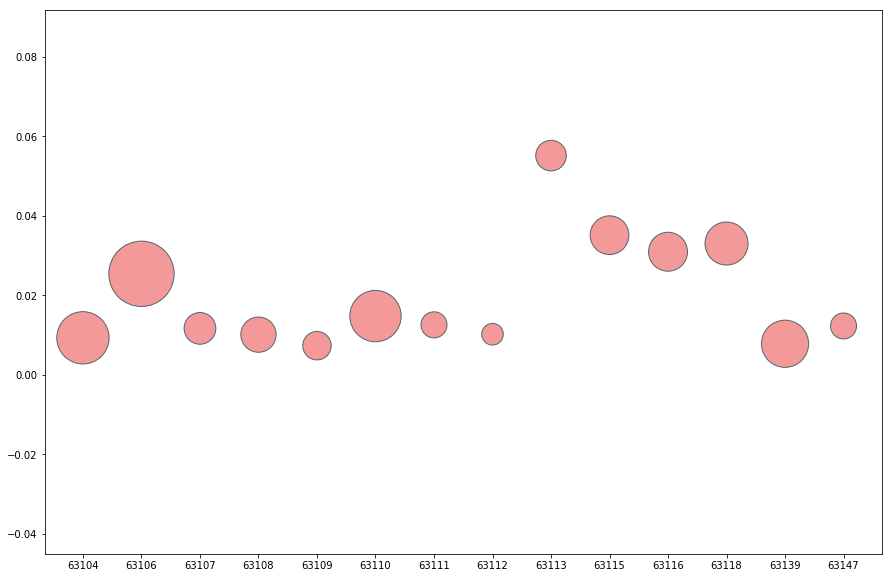

In [159]:
valid_zips = ['63104', '63106', '63107', '63108', '63109', '63110', '63111','63112', '63113',
            '63115', '63116', '63118', '63139','63147']
size=District_Join.groupby(["Zip Code"]).sum()["Size"]
incidents=District_Join.groupby(["Zip Code"]).mean()["Avg_Incident"]

#size_ayp = pd.DataFrame({"Total Students"   :size,
                        # "Average AYP"      :ayp})
plt.figure(figsize=(15,10))
plt.scatter(x=valid_zips, y=incidents, s = 1 * size, marker="o", color="lightcoral", edgecolor = "darkslategray",
           alpha = .8, label='Incidents', lw=1)
plt.show()                       

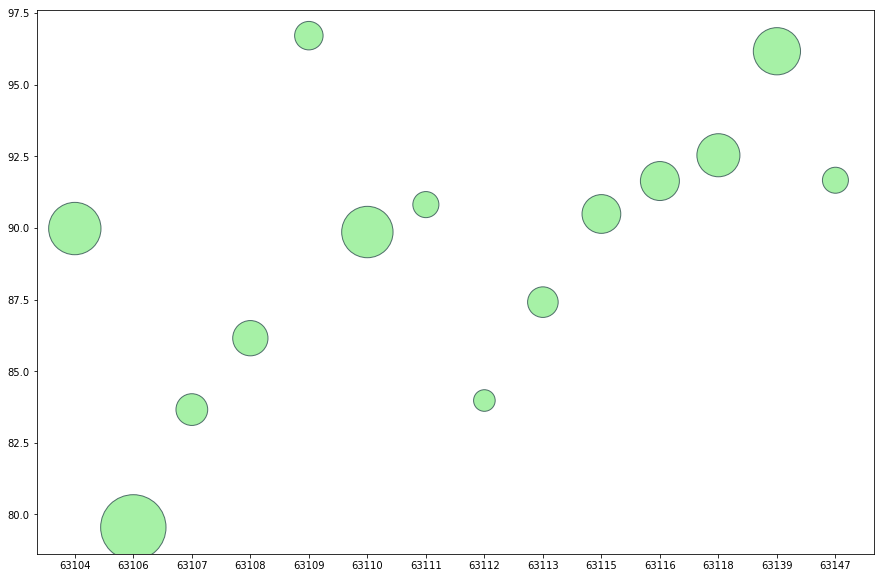

In [160]:
valid_zips = ['63104', '63106', '63107', '63108', '63109', '63110', '63111','63112', '63113',
            '63115', '63116', '63118', '63139','63147']
size=District_Join.groupby(["Zip Code"]).sum()["Size"]
HQT=District_Join.groupby(["Zip Code"]).mean()["Percent_HQT"]

#size_ayp = pd.DataFrame({"Total Students"   :size,
                        # "Average AYP"      :ayp})
plt.figure(figsize=(15,10))
plt.scatter(x=valid_zips, y=HQT, s = 1 * size, marker="o", color="lightgreen", edgecolor = "darkslategray",
           alpha = .8, label='HQT', lw=1)
plt.show()        

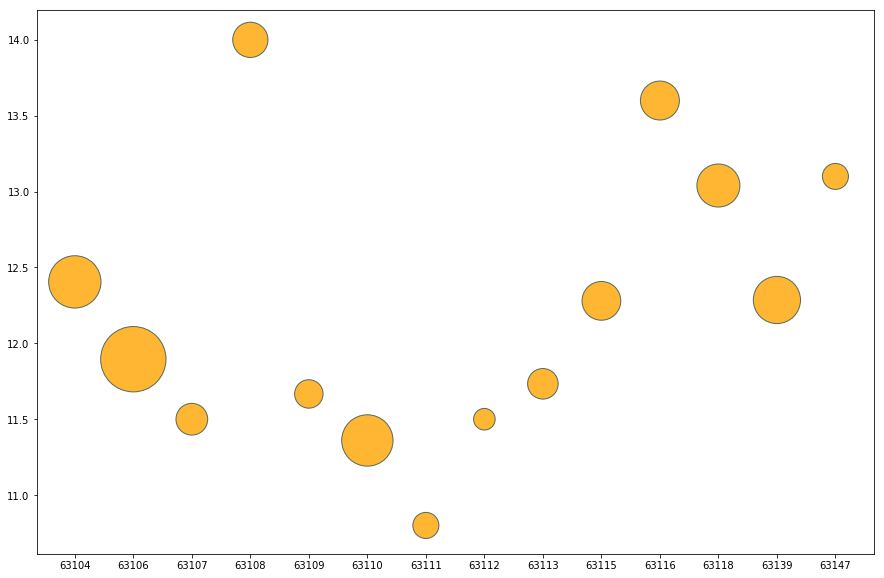

In [161]:
valid_zips = ['63104', '63106', '63107', '63108', '63109', '63110', '63111','63112', '63113',
            '63115', '63116', '63118', '63139','63147']
size=District_Join.groupby(["Zip Code"]).sum()["Size"]
ratio=District_Join.groupby(["Zip Code"]).mean()["Students_Per_Teacher"]

#size_ayp = pd.DataFrame({"Total Students"   :size,
                        # "Average AYP"      :ayp})
plt.figure(figsize=(15,10))
plt.scatter(x=valid_zips, y=ratio, s = 1 * size, marker="o", color="orange", edgecolor = "darkslategray",
           alpha = .8, label='Ratio', lw=1)
plt.show()      